Project for module 3, CAS Applied Data Science, 2021-03-12, P. Meyer, F. Fürst, P. Hurni University of Bern.

***
# Butterfly Classification
***


### Contents

**[0. Introduction](#intro)**

**[1. Load libraries](#loadlibraries)**     
  
**[2. Load data](#loaddata)**

  * [2.1 Load images (x)](#loadimages)
  * [2.2 Generate labels (y)](#generatelabels)

**[3. Having a quick look at the data](#quicklook)**

**[4. Label encoding and one hot encoding ](#labelencoding)**

**[5. Train-Test-Split](#traintest)**
  
**[6. Building a model](#buildmodel)**

**[7. Train the model](#trainmodel)**

**[10. Conclusion](#conclusion)**


***

<a name="intro"></a>
# 0. Introduction

<a name="loadlibraries"></a>
# 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
# only in a Jupyter Notebook
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('./leedsbutterfly/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./leedsbutterfly/.DS_Store
./leedsbutterfly/README.txt
./leedsbutterfly/images/0060050.png
./leedsbutterfly/images/0060087.png
./leedsbutterfly/images/0060093.png
./leedsbutterfly/images/0070055.png
./leedsbutterfly/images/0020104.png
./leedsbutterfly/images/0020110.png
./leedsbutterfly/images/0070069.png
./leedsbutterfly/images/0020138.png
./leedsbutterfly/images/0040155.png
./leedsbutterfly/images/0070096.png
./leedsbutterfly/images/0090162.png
./leedsbutterfly/images/0010004.png
./leedsbutterfly/images/0010010.png
./leedsbutterfly/images/0090176.png
./leedsbutterfly/images/0040141.png
./leedsbutterfly/images/0070082.png
./leedsbutterfly/images/0040169.png
./leedsbutterfly/images/0010038.png
./leedsbutterfly/images/0070121.png
./leedsbutterfly/images/0020070.png
./leedsbutterfly/images/0020064.png
./leedsbutterfly/images/0020058.png
./leedsbutterfly/images/0040035.png
./leedsbutterfly/images/0040009.png
./leedsbutterfly/images/0030061.png
./leedsbutterfly/images/0060118.png
./leedsbu

In [3]:
# help(os.walk)

<a name="loaddata"></a>
# 2. Load data

<a name="loadimages"></a>
## 2.1 Load images (x)

See https://pillow.readthedocs.io/en/stable/reference/Image.html

In [4]:
import glob
from PIL import Image
x = [] # array of all images
for img in glob.glob("./leedsbutterfly/images/*.png"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    x.append(np.array(size_image))

In [5]:
x = np.array(x)

In [6]:
x.shape

(832, 128, 128, 3)

In [7]:
x[0].shape

(128, 128, 3)

In [8]:
type(x)

numpy.ndarray

In [9]:
# Create variables for later use
image_width = x.shape[1]
image_height = x.shape[2]
image_channels = x.shape[3]
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Image channels: {image_channels}")

Image width: 128
Image height: 128
Image channels: 3


<a name="generatelabels"></a>
## 2.2 Generate labels (y)

In [10]:
categories = []
filenames = os.listdir("./leedsbutterfly/images/")
for filename in filenames:
        category = filename.split(".")[0]
        categories.append(category[0:3])

In [11]:
categories[0:10]

['006', '006', '006', '007', '002', '002', '007', '002', '004', '007']

In [12]:
df = pd.DataFrame({
    'Filename' : filenames,
    'Category' : categories
})
df.head()

,Filename,Category
0,0060050.png,006
1,0060087.png,006
2,0060093.png,006
3,0070055.png,007
4,0020104.png,002


In [13]:
df['Category'] = df['Category'].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'}) 
df.head()

,Filename,Category
0,0060050.png,Nymphalis_antiopa
1,0060087.png,Nymphalis_antiopa
2,0060093.png,Nymphalis_antiopa
3,0070055.png,Papilio_cresphontes
4,0020104.png,Heliconius_charitonius


In [14]:
df['Category'].value_counts()

Nymphalis_antiopa         100
Heliconius_charitonius     93
Vanessa_atalanta           91
Junonia_coenia             90
Papilio_cresphontes        89
Lycaena_phlaeas            88
Vanessa_cardui             83
Danaus_plexippus           82
Heliconius_erato           61
Pieris_rapae               55
Name: Category, dtype: int64

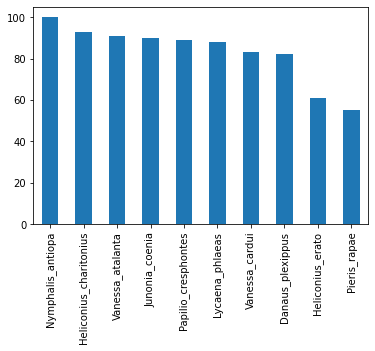

In [15]:
df['Category'].value_counts().plot.bar();

<a name="quicklook"></a>
# 3. Having a quick look at the data

In [16]:
# First array contains the (sorted) unique values
# Second array (returned if return_index is set to True) is a list of the indexes of the first occurrences
l = np.unique(df['Category'], return_index=True)
l

(array(['Danaus_plexippus', 'Heliconius_charitonius', 'Heliconius_erato',
        'Junonia_coenia', 'Lycaena_phlaeas', 'Nymphalis_antiopa',
        'Papilio_cresphontes', 'Pieris_rapae', 'Vanessa_atalanta',
        'Vanessa_cardui'], dtype=object),
 array([11,  4, 24,  8, 29,  0,  3, 27, 10, 28]))

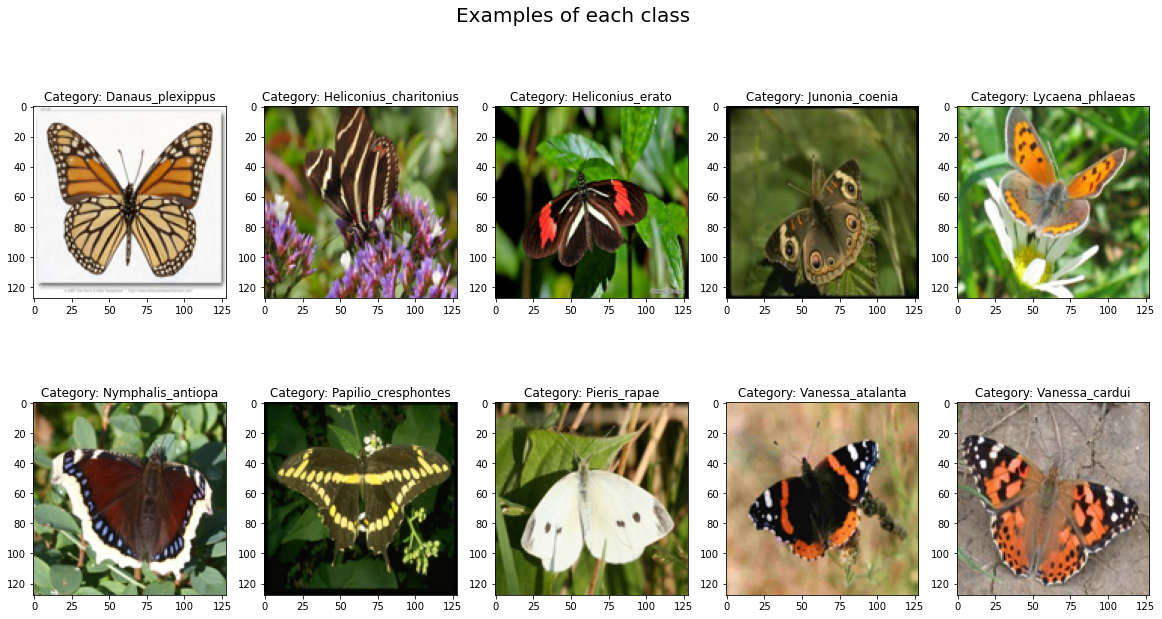

In [17]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs) # returns a 1-D array, containing the elements of the input
for i in range(0,10):
        axs[i].imshow(x[l[1][i]])
        axs[i].set_title(f"Category: {l[0][i]}")
fig.suptitle('Examples of each class', fontsize=20)
plt.show()

<a name="labelencoding"></a>
# 4. Label encoding and one hot encoding 

- https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
- https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

In [18]:
# Convert Category strings to label numbers
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])

In [19]:
enc.classes_

array(['Danaus_plexippus', 'Heliconius_charitonius', 'Heliconius_erato',
       'Junonia_coenia', 'Lycaena_phlaeas', 'Nymphalis_antiopa',
       'Papilio_cresphontes', 'Pieris_rapae', 'Vanessa_atalanta',
       'Vanessa_cardui'], dtype=object)

In [20]:
df.head()

,Filename,Category
0,0060050.png,5
1,0060087.png,5
2,0060093.png,5
3,0070055.png,6
4,0020104.png,1


In [21]:
y = df['Category'].values
type(y)

numpy.ndarray

In [22]:
print(f"Unique labels are: {np.unique(y)}")

Unique labels are: [0 1 2 3 4 5 6 7 8 9]


In [23]:
y.shape

(832,)

In [24]:
# One Hot encoding: convert column with label numbers to a sparse matrix 
y = y.reshape(len(y),1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() # Option: sparse=False
y = ohe.fit_transform(y)

In [25]:
y.shape

(832, 10)

In [26]:
y[0].shape

(1, 10)

In [27]:
type(y)

scipy.sparse.csr.csr_matrix

In [28]:
# If the type of y is a 'scipy.sparse.csr.csr_matrix', then calling tf.keras.models.Sequential().fit() will raise an error:
# ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'scipy.sparse.csr.csr_matrix'>

# Transform sparse matrix into a (dense) numpy array.
if isinstance(y, scipy.sparse.csr.csr_matrix):
    y = y.toarray()
     
print(f"Type of y is now: {type(y)}")

Type of y is now: <class 'numpy.ndarray'>


In [29]:
x.dtype

dtype('uint8')

In [30]:
y.dtype

dtype('float64')

<a name="traintest"></a>
# 5. Train-Test-Split

Split Dataset, see https://realpython.com/train-test-split-python-data/

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (665, 128, 128, 3)
Shape of x_test: (167, 128, 128, 3)
Shape of y_train: (665, 10)
Shape of y_test: (167, 10)


<a name="buildmodel"></a>
# 6. Building a model

In [33]:
import tensorflow as tf

In [34]:
print(tf.__version__)

2.0.0


In [35]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(image_width, image_height, image_channels)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))




model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

<a name="trainmodel"></a>
# 7. Train the model

**Warning**: `model.fit` does NOT reinitialize trainable variables. Every time it continues from the previous state.

In [37]:
# Save the state of the trainable variables after each epoch.
save_path = 'save/butterfly_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)


hist = model.fit(x = x_train,
                 y = y_train,
                 epochs = 35,
                 batch_size = 128, 
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

Train on 665 samples, validate on 167 samples
Epoch 1/35
665/665 [==============================] - 9s 14ms/sample - loss: 227.2316 - accuracy: 0.1083 - val_loss: 2.6070 - val_accuracy: 0.1856
Epoch 2/35
665/665 [==============================] - 7s 11ms/sample - loss: 2.3224 - accuracy: 0.1534 - val_loss: 2.2056 - val_accuracy: 0.1497
Epoch 3/35
665/665 [==============================] - 7s 10ms/sample - loss: 2.1979 - accuracy: 0.1684 - val_loss: 2.0562 - val_accuracy: 0.1916
Epoch 4/35
665/665 [==============================] - 7s 10ms/sample - loss: 2.0905 - accuracy: 0.2376 - val_loss: 1.9273 - val_accuracy: 0.3114
Epoch 5/35
665/665 [==============================] - 7s 11ms/sample - loss: 1.9748 - accuracy: 0.2797 - val_loss: 1.8487 - val_accuracy: 0.3054
Epoch 6/35
665/665 [==============================] - 7s 11ms/sample - loss: 1.8676 - accuracy: 0.3263 - val_loss: 1.7093 - val_accuracy: 0.3713
Epoch 7/35
665/665 [==============================] - 7s 11ms/sample - loss: 1.743

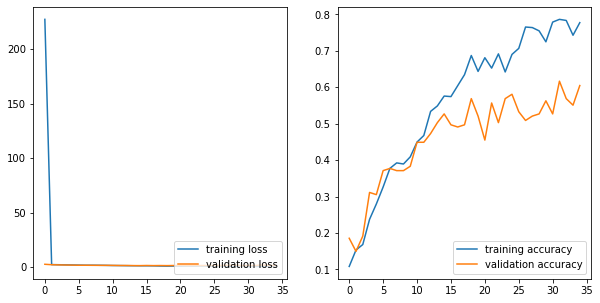

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [39]:
# Compare how the current model performs on the test dataset:
model.evaluate(x_test,  y_test, verbose=2)

167/1 - 1s - loss: 1.4360 - accuracy: 0.6048


[1.4028578889584113, 0.6047904]

## Test trained model on an image

In [40]:
x_test.shape, x_test[0:1].shape, x_test[0].shape

((167, 128, 128, 3), (1, 128, 128, 3), (128, 128, 3))

In [41]:
y_test.shape

(167, 10)

In [42]:
# A prediction is an array of 10 numbers.
# They represent the model's "confidence" that the image corresponds to each of the 10 different classes of butterflies
y_pred = model.predict(x_test[3:4].astype(float))
y_pred

array([[3.7886322e-04, 3.4477468e-06, 1.3735741e-09, 4.2245493e-10,
        4.1862548e-11, 3.3927683e-09, 9.9955541e-01, 1.6894657e-14,
        4.7891972e-06, 5.7478075e-05]], dtype=float32)

In [43]:
y_pred.ravel()[1]

3.4477468e-06

Predicted label: 1 (Heliconius_charitonius) with 1.00% confidence
True label: 1 (Heliconius_charitonius)


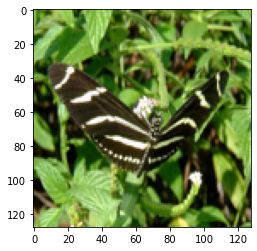

In [44]:
# Test trained model on an image

# Choose some random image id
import random
im_id = random.choice(range(x_test.shape[0]))
# Test trained model on image with id = im_id 
y_pred = model.predict(x_test[im_id:im_id+1].astype(float))
# Print the index of the class with the highest predicted probability
print(f'Predicted label: {np.argmax(y_pred)} ({enc.classes_[np.argmax(y_pred)]}) with {y_pred.ravel()[np.argmax(y_pred)]:2.2f}% confidence')
# Print true label
print(f'True label: {np.argmax(y_test[im_id])} ({enc.classes_[np.argmax(y_test[im_id])]})')
plt.imshow(x_test[im_id]);

# Loading trained model

In [48]:
model.load_weights('save/butterfly_1.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/butterfly_10.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/butterfly_32.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

167/1 - 1s - loss: 2.3998 - accuracy: 0.1856
167/1 - 1s - loss: 1.3904 - accuracy: 0.3832
167/1 - 1s - loss: 1.8843 - accuracy: 0.6168


[1.4182981630999172, 0.61676645]

# Inspecting trained variables

In [46]:
#l = model.get_layer(index=1)
#w, b = l.weights

#w = w.numpy()
#b = b.numpy()
#print(w.shape, b.shape)
#w = w.reshape((28,28,-1)).transpose((2, 0, 1))

In [47]:
# Visualize 5
#n = 5
#fig, axs = plt.subplots(1, n, figsize=(4.1*n,4))
#for i, wi in enumerate(w[:5]):
#  axs[i].imshow(wi, cmap='gray')

<a name="conclusion"></a>
# 10. Conclusion